In [ ]:
from google.colab import files
uploaded = files.upload()

Saving messy_ecommerce_sales.csv to messy_ecommerce_sales.csv


In [ ]:
import pandas as pd

df = pd.read_csv("messy_ecommerce_sales.csv")
df.head()

,order_id,order_date,customer_id,product,category,quantity,unit_price,country
0,168268,2022-01-01,2095,Headphones,Electronics,2.0,954.91,UK
1,143567,2022-01-02,2110,Headphones,Electronics,1.0,393.19,USA
2,142613,2022-01-03,2210,Headphones,Electronics,2.0,103.57,France
3,145891,2022-01-04,2132,Bag,NaN,2.0,1047.48,Nigeria
4,121243,2022-01-05,2028,Shoes,Electronics,1.0,887.05,Germany


In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     1200 non-null   int64  
 1   order_date   1140 non-null   object 
 2   customer_id  1200 non-null   int64  
 3   product      1061 non-null   object 
 4   category     1087 non-null   object 
 5   quantity     1061 non-null   float64
 6   unit_price   1200 non-null   float64
 7   country      1095 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 75.1+ KB


,0
order_id,0
order_date,60
customer_id,0
product,139
category,113
quantity,139
unit_price,0
country,105


In [ ]:
#Fix Date Column
df['order_date'] = pd.to_datetime(df['order_date'] , errors = 'coerce')
df['order_date'].isna().sum()

np.int64(60)

In [ ]:
#Drop rows with missing dates
df = df.dropna(subset=['order_date'])

In [ ]:
#Handle Negative Prices
df = df[df['unit_price'] > 0]

In [10]:
#Handle Missing Quantity
df['quantity'] = df['quantity'].fillna(df['quantity'].median())

In [11]:
#Handle Missing Categorical Values
df['product'] = df['product'].fillna('Unknown')
df['category'] = df['category'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [12]:
#Create Revenue
df['revenue'] = df['quantity'] * df['unit_price']

In [13]:
#Create Time Features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%b')

In [14]:
#Quality Check
df.isna().sum()
df.describe()

,order_id,order_date,customer_id,quantity,unit_price,revenue,year,month
count,1082.000000,1082,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,151344.945471,2023-08-22 16:47:28.059149824,2148.145102,2.067468,756.433410,1549.229261,2023.181146,6.039741
min,100131.000000,2022-01-01 00:00:00,2000.000000,1.000000,6.420000,10.100000,2022.000000,1.000000
25%,126901.500000,2022-10-24 06:00:00,2074.250000,1.000000,400.552500,617.062500,2022.000000,3.000000
50%,152128.000000,2023-08-25 12:00:00,2144.000000,2.000000,748.035000,1261.600000,2023.000000,6.000000
75%,175986.500000,2024-06-14 18:00:00,2223.000000,3.000000,1127.345000,2314.412500,2024.000000,9.000000
max,199975.000000,2025-04-14 00:00:00,2299.000000,4.000000,1499.720000,5906.480000,2025.000000,12.000000
std,28744.594801,NaN,86.623635,0.991208,425.770936,1196.668812,0.965882,3.510430


In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Total Revenue
total_revenue = df['revenue'].sum()
total_revenue

np.float64(1676266.06)

In [19]:
#Total Orders
total_orders = df['order_id'].nunique()
total_orders

1070

In [20]:
#Total Customers
total_customers = df['customer_id'].nunique()
total_customers

293

In [21]:
#Monthly Revenue Trend
monthly_revenue = (
    df.groupby(['year', 'month', 'month_name'])['revenue']
      .sum()
      .reset_index()
      .sort_values(['year', 'month'])
)

monthly_revenue

,year,month,month_name,revenue
0,2022,1,Jan,50738.41
1,2022,2,Feb,35877.06
2,2022,3,Mar,44653.81
3,2022,4,Apr,32309.37
4,2022,5,May,45119.00
5,2022,6,Jun,45756.80
6,2022,7,Jul,38476.34
7,2022,8,Aug,40449.17
8,2022,9,Sep,41224.61
9,2022,10,Oct,49115.04


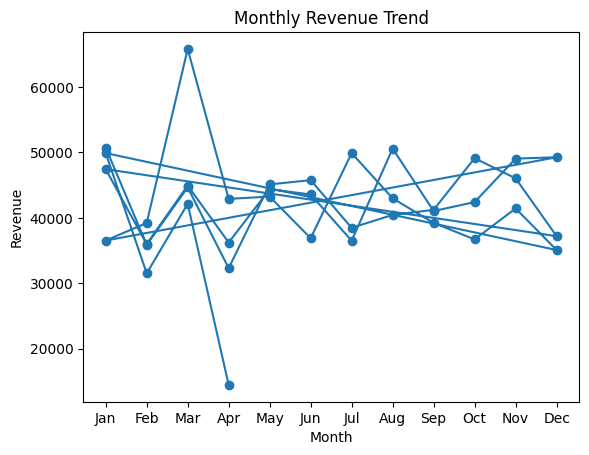

In [22]:
plt.figure()
plt.plot(monthly_revenue['month_name'], monthly_revenue['revenue'], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [23]:
#Top Products by Revenue
top_products = (
    df.groupby('product')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top_products

,product,revenue
0,Phone,314744.97
1,Bag,260044.94
2,Headphones,256179.09
3,Shoes,240042.27
4,Laptop,214347.01
5,Unknown,197400.49
6,Watch,193507.29


In [24]:
#Top Products by Revenue
top_products = (
    df.groupby('product')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top_products

,product,revenue
0,Phone,314744.97
1,Bag,260044.94
2,Headphones,256179.09
3,Shoes,240042.27
4,Laptop,214347.01
5,Unknown,197400.49
6,Watch,193507.29


In [25]:
#Category Performance
category_revenue = (
    df.groupby('category')['revenue']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

category_revenue

,category,revenue
0,Electronics,748604.42
1,Fashion,608801.30
2,Accessories,172510.83
3,Unknown,146349.51


In [26]:
#Top Customers
top_customers = (
    df.groupby('customer_id')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top_customers

,customer_id,revenue
0,2273,20150.35
1,2285,18737.27
2,2181,18153.41
3,2225,17091.54
4,2203,15121.45
5,2134,14346.00
6,2073,14176.14
7,2016,13824.87
8,2132,13723.60
9,2072,13628.14


In [27]:
#Country-Level Sales
country_sales = (
    df.groupby('country')['revenue']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

country_sales

,country,revenue
0,USA,486698.78
1,UK,334876.52
2,France,297940.30
3,Germany,256284.72
4,Nigeria,167088.99
5,Unknown,133376.75
